In [1]:
!pip install transformers torch
!pip install pandas # To work with dataframes
!pip install matplotlib seaborn # For visualization

In [3]:
# Sample dataset of reviews
reviews = [
    "The new software update is fantastic, everything works so smoothly now!",
    "I'm very disappointed with the customer service. They were unhelpful.",
    "The restaurant's food was bland and the service was slow.",
    "This book is an absolute masterpiece, a must-read for everyone.",
    "The delivery was on time, but the product was damaged.",
    "The team's performance was great, a truly impressive comeback."
]

In [5]:
import pandas as pd

# Replace 'your_path_to_file' with the actual path to your CSV file on Google Drive
# Example: '/content/drive/MyDrive/Data/reviews.csv'
file_path = '/content/drive/MyDrive/Data/your_reviews_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(df.head())

# Assuming your text data is in a column named 'review_text'
reviews = df['review_text'].tolist()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data/your_reviews_dataset.csv'

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)


100%|██████████| 54.4M/54.4M [00:00<00:00, 263MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9


In [7]:
# Import the pipeline from the transformers library
from transformers import pipeline

# Load the pre-trained sentiment analysis model
# This model is a fine-tuned version of DistilBERT for sentiment classification.
# It will be downloaded the first time you run this cell.
sentiment_pipeline = pipeline('sentiment-analysis')

# Run the analysis on your list of reviews
results = sentiment_pipeline(reviews)

# Display the results
for i, review in enumerate(reviews):
    print(f"Review: '{review}'")
    print(f"Sentiment: {results[i]['label']} (Score: {results[i]['score']:.2f})\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Review: 'The new software update is fantastic, everything works so smoothly now!'
Sentiment: POSITIVE (Score: 1.00)

Review: 'I'm very disappointed with the customer service. They were unhelpful.'
Sentiment: NEGATIVE (Score: 1.00)

Review: 'The restaurant's food was bland and the service was slow.'
Sentiment: NEGATIVE (Score: 1.00)

Review: 'This book is an absolute masterpiece, a must-read for everyone.'
Sentiment: POSITIVE (Score: 1.00)

Review: 'The delivery was on time, but the product was damaged.'
Sentiment: NEGATIVE (Score: 1.00)

Review: 'The team's performance was great, a truly impressive comeback.'
Sentiment: POSITIVE (Score: 1.00)



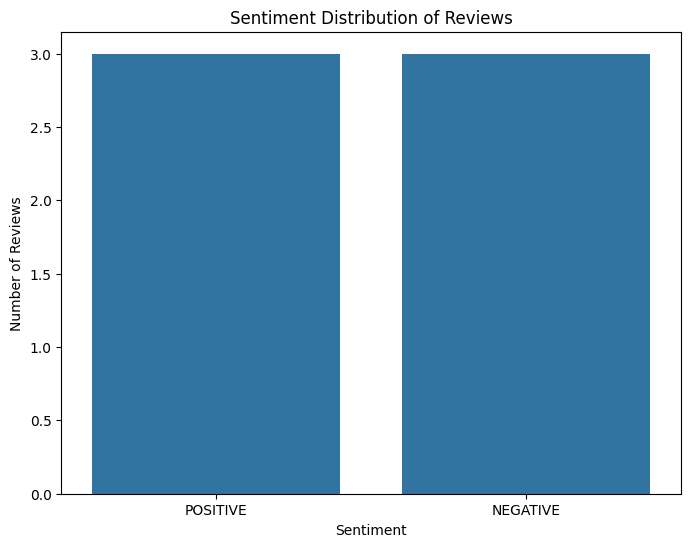

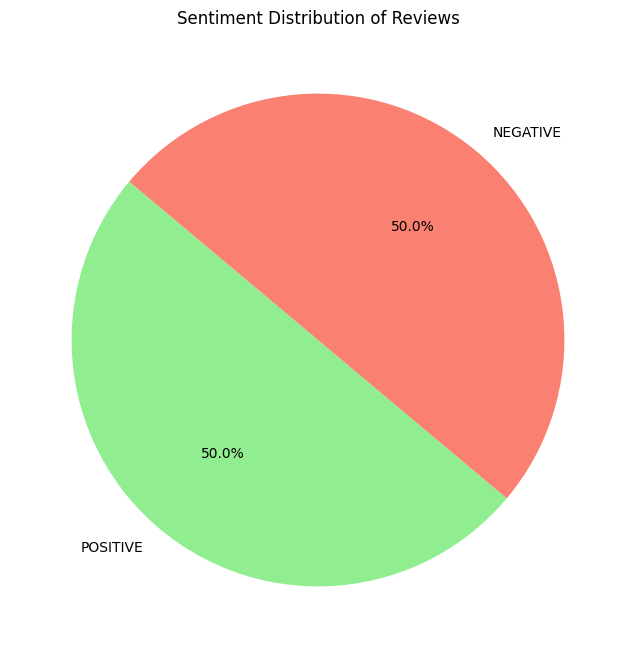

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract labels from the results
sentiment_labels = [result['label'] for result in results]

# Count the occurrences of each sentiment
sentiment_counts = pd.Series(sentiment_labels).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon', 'skyblue'])
plt.title('Sentiment Distribution of Reviews')
plt.show()